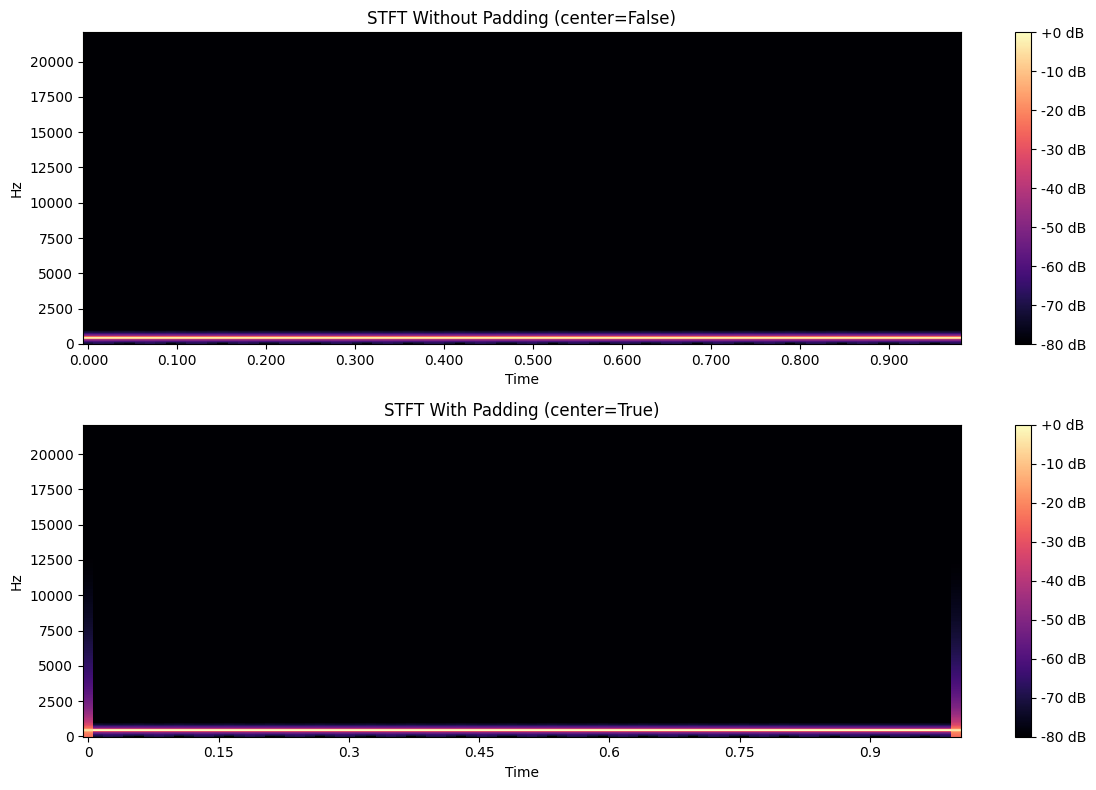

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Generate a test signal (1 sec of a 440Hz sine wave)
fs = 44100  # Sample rate
t = np.linspace(0, 1, fs, endpoint=False)
signal = np.sin(2 * np.pi * 440 * t)  # Pure sine wave at 440Hz

# STFT parameters
n_fft = 1024       # Window size
hop_length = 512   # Hop size (50% overlap)
win_length = 1024  # Window length

# Compute STFT **without padding**
stft_no_pad = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length, 
                           win_length=win_length, center=False)

# Compute STFT **with padding (default: center=True)**
stft_with_pad = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length, 
                             win_length=win_length, center=True)

# Convert to dB for visualization
stft_no_pad_db = librosa.amplitude_to_db(np.abs(stft_no_pad), ref=np.max)
stft_with_pad_db = librosa.amplitude_to_db(np.abs(stft_with_pad), ref=np.max)

# Plot the results
plt.figure(figsize=(12, 8))

# Spectrogram without padding
plt.subplot(2, 1, 1)
librosa.display.specshow(stft_no_pad_db, sr=fs, hop_length=hop_length, 
                         x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Without Padding (center=False)')

# Spectrogram with padding
plt.subplot(2, 1, 2)
librosa.display.specshow(stft_with_pad_db, sr=fs, hop_length=hop_length, 
                         x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT With Padding (center=True)')

plt.tight_layout()
plt.show()